# Welcome to the Machine learning for IDE students application!

This is a JupyterNotebook created for IDE students to get introduced to using machine learning for prototype improvement. It might seem like a lot if you don't have any coding experience, but just follow the steps, read the instructions and it should be a breeze! 

## Setting up

This application will take you through the preprocessing, labeling and classification steps of the machine learning process. Make sure you've read through the [User Guide](https://docs.google.com/document/d/1J9c5sHokh8Rj-4lO4yKX1Tv7LwY2_r-mfQ9YKviiXZk/edit?usp=sharing) before you continue.

To be able to access the code we need to import packages. The second set of packages are written by us and contain the main functions of the program. The actual Python code is to be found in different files, so you have a nice interface without a bunch of code. 

**Make sure you run the two cells below!** To run your first cell, just click inside the cell and press play. You can consult [this tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) if you experience difficulty using Anaconda.
ATTENTION: It is very important to run the code completely, so only continue after the * before the cell has disappeared

In [1]:
!pip3 install numpy==1.21.4 # 1.24.1 
!pip3 install pandas==1.5.2
!pip3 install matplotlib==3.6.3
!pip3 install scikit-learn==1.2.0
!pip3 install plotly==5.12.0
!pip3 install IPython==8.8.0
!pip3 install kaleido==0.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 9.5 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.


In [2]:
from AI_for_Designers.data_processing import Preprocessing, empty_files
from AI_for_Designers.active_learning import ActiveLearning
from AI_for_Designers.novelty_detection import NoveltyDetection
from AI_for_Designers.data_stats import Stats
from AI_for_Designers.Notebook import check_activity_name, amount_of_samples

In the cell below, the name of the Activity can be changed. It helps come up with a descriptive name like the name of the prototype. ATTENTION: the name should only contain letters, numbers, underscores and dashes. 

In [3]:
Activity = 'Mok'
check_activity_name(Activity)

Name is valid!


## Pre-processing
During preprocessing, the raw data gets divided into frames. This makes for more certain predictions and a faster model.

There are **4 variables** that are important for you to edit:

 - Frame size: set larger for slow movements, smaller for very quick movements. A frame size of about the length of one action is advides. Default = 2 sec
 - Frame offset: increase if you set a bigger frame size. A frame offset of around 10-20% of the frame size is advised. A lower frame offset might result in a more accurate model, but will result in more work for you. Default = 0.2 sec
 - Start-chop (start_offset=...): set it to the time it takes in seconds between starting the recording and starting with the actual activity.
 - End-chop (stop_offset=...): the same as the start-chop, but for the end of a recording

Enter the values below, and run the cell to start the preprocessing. The frame size and the frame offset can be changed in the cell below, while the start-chop and the end-chap need to be changed in all the lines that start with 'pre.windowing'. ATTENTION: the frame size and the frame offset, need to be the same for all the different files, while the start-chop and the end-chop may differ.

After you've preprocessed your data, the application will have extracted features like standard deviation and most present frequency. These features will be used to analyze the characteristics of a data point and classify it to an activity.

In [4]:
frame_size = 0.8
frame_offset = 0.1

In [5]:
empty_files([f'Preprocessed-data/{Activity}/features_{Activity}.txt',
             f'Preprocessed-data/{Activity}/features_{Activity}_scaled.csv',
             f'Preprocessed-data/{Activity}/processed_data_files.txt'])

pre = Preprocessing(Activity)
# pre.windowing([r"Data/data-lopen/Walking_part_1.csv", r"Data/data-lopen/Walking_part_1_gyro.csv"], r"Data/data-lopen/Walking_part_1.mp4",
#               start_offset=2.5, stop_offset=5, size=1, offset=0.2, epsilon=0.01, do_plot=False, do_scale=False)
# pre.windowing([r"Data/data-lopen/Walking_part_2.csv", r"Data/data-lopen/Walking_part_2_gyro.csv"], r"Data/data-lopen/Walking_part_2.mp4",
#               start_offset=2.5, stop_offset=5, size=1, offset=0.2, epsilon=0.01, do_plot=False, do_scale=True)
# pre.windowing([fr'Data\data-cycling\ACCL\Timo_fietsen_GH010031-ACCL.csv', fr'Data\data-cycling\GYRO\Timo_fietsen_GH010031-GYRO.csv'], 'Data\data-cycling\Fiets_filmpjes\GL010031_LRV_compressed.mp4',
#               start_offset=0, stop_offset=0, size=5, offset=0.5, epsilon=0.01, do_plot=False, do_scale=False)
# pre.windowing([fr'Data\data-cycling\ACCL\Timo_fietsen_GH010032-ACCL.csv', fr'Data\data-cycling\GYRO\Timo_fietsen_GH010032-GYRO.csv'], 'Data\data-cycling\Fiets_filmpjes\GL010032_LRV.mp4',
#               start_offset=0, stop_offset=0, size=5, offset=0.5, epsilon=0.01, do_plot=False, do_scale=False)
# pre.windowing([fr'Data\data-cycling\ACCL\Timo_fietsen_GH010033-ACCL.csv', fr'Data\data-cycling\GYRO\Timo_fietsen_GH010033-GYRO.csv'], 'Data\data-cycling\Fiets_filmpjes\GL010033_LRV.mp4',
#               start_offset=0, stop_offset=0, size=5, offset=0.5, epsilon=0.01, do_plot=False, do_scale=False)
# pre.windowing([fr'Data\data-cycling\ACCL\Timo_fietsen_GH010034-ACCL.csv', fr'Data\data-cycling\GYRO\Timo_fietsen_GH010034-GYRO.csv'], 'Data\data-cycling\Fiets_filmpjes\GL010034_LRV_compressed.mp4',
#               start_offset=0, stop_offset=0, size=5, offset=0.5, epsilon=0.01, do_plot=False, do_scale=True)
pre.windowing([r'Data/data-mok/Gijs_Mok_GH010035-ACCL.csv', r'Data/data-mok/Gijs_Mok_GH010035-GYRO.csv'], 'Data/data-mok/GL010035_LRV.mp4',
              start_offset=0, stop_offset=0, size=frame_size, offset=frame_offset, epsilon=0.01, do_plot=False, do_scale=True)

Do you want to save the extracted features '' for 'Mok'? y/n
y
Amount of sensors: 6, amount of features per sensor: 8


## Labeling and training

If you've set up your preprocessing correctly this step should be quite easy. The application will show you part of your recording, and you will be asked to label it according to the action performed on screen. You can add a new label if the activity you see is not one of the options you expected. 

First, enter the activities that you think will be in the video. Don't worry about doing this extensively, you can always add more later.

An example:

    labels = ['walking', 'running', 'stairs_up', 'stairs_down']

Enter your labels inside the code block below. **Only change the text inside the brackets, remember to put the values in quotation marks and seperate them by commas**.

Next up is training the model. After entering your labels, run the cell and you will be shown a GIF and asked to label the activity you see. Take your time to label the data correctly, as the results fully rely on accurate labels. You get the option to delete a data point if you are not completely sure about the label (e.g. the sample contains two different actions) or if it's a faulty sample. 

The value of 'active_learning_iterations', is the amount of samples you will label. The more samples you label, the more accurate the model might become, but the more time it will consume. Labeling round 10-20% of the total amount of samples or at least 100 samples is advised. The cell below can be used to find the amount of available samples.

After labeling 16 samples, a list (recognizable by its square bracets []) apears under the video with the probability that this frame is the corresponding label, so the first value in the list corresponds with the first option under the video.


In [6]:
print(amount_of_samples(f'Preprocessed-data/{Activity}/processed_data_files.txt'))

1890


In [7]:
labels = ['stil', 'oppakken', 'neerzetten', 'drinken', 'lopen']
active_learning_iterations = 100

81.29999999999966 0.8


[0.0, 0.0, 0.0, 0.5, 0.0, 0.5]
Enter the index or the name of one of the following labels. Enter 'n' to add a new label or 'x' to discard this sample:
1. stil
2. oppakken
3. neerzetten
4. drinken
5. lopen
6. naar plafond kijken
1


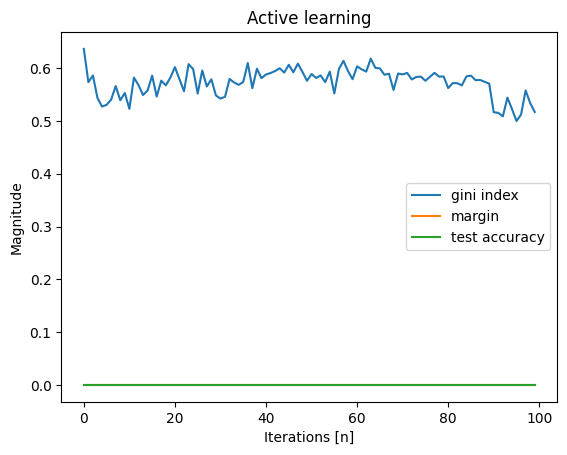

'Preprocessed-data/Mok/features_Mok_scaled_AL_predictionss.csv'

In [8]:
AL = ActiveLearning(fr'Preprocessed-data/{Activity}/features_{Activity}_scaled.csv', Activity, labels, frame_size)
labels = AL.training(active_learning_iterations, random_points=2)
AL.plotting()
AL.write_to_file()

In order to get an idea of how accurate the model is, it is advised to label some more data. These frames are not used in training the model, but the model is used to predict the action that is happening in this frame. By telling the model which action actually is happening in the frame, the accuracy can be measured, by calculating the error rate (dividing the wrong labled frames by the total amount of frames). It is advised to label at least 20 frames, but preferably more (about 50). The more frames are labled, the better the indication of the accuracy is.

In [9]:
AL.testing(50)

116.89999999999765 0.8


TESTING
Enter the index or the name of one of the following labels. Enter 'n' to add a new label or 'x' to discard this sample:
1. stil
2. oppakken
3. neerzetten
4. drinken
5. lopen
6. naar plafond kijken
1
Error rate: 0.04 (50 samples)


(2, 50)

## Congratulations!

You have just trained a machine-learning model. It's now ready to make predictions on real-world data, detect unexpected use of your product, and show you analytics about usage. This will help you to create a better product.


The code snippits below are to help you visualize what action was taken over time. In the first cell, some novelties are shown. These frames are selected by a detector and flagged as a frame where the model is not really certain about that this is the right label. 10% percent of the frames are shown as novelties, but this can be altered by changing the number inside the ND.detect() function. This number should be between 0 and 1. In the second cell some statistics are shown. First all the percentages of the label occuring in the data are printed and after that a figure of when each label occurs (this cell might take some time (minutes) to finish, depending on the amount of frames).

In [10]:
ND = NoveltyDetection(fr'Preprocessed-data/{Activity}/features_{Activity}_scaled_AL_predictionss.csv', fr'Preprocessed-data/{Activity}/processed_data_files.txt')
novelties = ND.detect(0.1)
ND.play_novelties(novelties, frame_size)

In [15]:
stats = Stats(fr'Preprocessed-data/{Activity}/features_{Activity}_scaled_AL_predictionss.csv', labels)
stats.print_percentages()
stats.show_ghan_chart(frame_offset)

Percentages per label:
 stil: 0.47378898473788983
 oppakken: 0.0451227604512276
 neerzetten: 0.12276045122760451
 drinken: 0.072992700729927
 lopen: 0.26741871267418715
 naar plafond kijken: 0.017916390179163903


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


## New Data

In the section beneath we will quickly run through some of the same steps as above, but now we can feed the model that we created with new, unseen data. The model created in the steps above will be used to predict the actions happening in this unseen data. This can be helpful for testing the robustness of your model when data was gathered by different people.

Now you can feed the trained model more data, for example about real-life use of your product, by changing the 'pre_new.windowing' function!!

In [ ]:
import numpy as np
import pandas as pd
import pickle

empty_files([f'Preprocessed-data/{Activity}_new/features_{Activity}_new.txt',
             f'Preprocessed-data/{Activity}_new/features_{Activity}_new_scaled.csv',
             f'Preprocessed-data/{Activity}_new/processed_data_files.txt'])

# Load the model that you made using pickle
model = pickle.load(open(fr'Models/model_{Activity}_{active_learning_iterations}.pickle', 'rb'))

# Preprocess the new data
pre_new = Preprocessing(f'{Activity}_new')
pre_new.windowing([r'GoPro\Gijs_Mok\Gijs_Mok_GH010035-ACCL.csv', r'GoPro\Gijs_Mok\Gijs_Mok_GH010035-GYRO.csv'], 'GoPro\Gijs_Mok\GL010035_LRV.mp4',
              start_offset=0, stop_offset=0, size=frame_size, offset=frame_offset, epsilon=0.01, do_plot=False, do_scale=True)

# Predict the label of all samples based on the 
new_dataset = pd.read_csv(fr'Preprocessed-data/{Activity}_new/features_{Activity}_new_scaled.csv', delimiter=',')
predictions = model.predict(np.array(new_dataset.iloc[:, 3:]))

# Replace the labels and write them to a new AL prediction file
new_dataset['label'] = predictions
new_dataset.to_csv(fr'Preprocessed-data/{Activity}_new/features_{Activity}_new_scaled_AL_predictionss.csv', index=False)

# Use the new file to retrieve the predicted timeline
stats = Stats(fr'Preprocessed-data/{Activity}_new/features_{Activity}_new_scaled_AL_predictionss.csv', labels)
stats.print_percentages()
stats.show_ghan_chart(frame_offset)